# MATH2504 Project 1 - 2023

## Emmanuel Skoufris - 46388078 

GitHub repository for this project: https://github.com/ESkoufris/Emmanuel-Skoufris-2504-2023-PROJECT1.git

### Tests

In [67]:
using Pkg
Pkg.activate(".")

include("poly_factorization_project.jl")

  Activating project at `c:\Users\skouf\Documents\2023\Semester 2\MATH2504\Assessment\Project1\Emmanuel-Skoufris-2504-2023-PROJECT1`


10	25	35	
(i, value) = (10, "kbwcr")
(i, value) = (20, "dcsha")
(i, value) = (30, "oxgil")
(i, value) = (40, "xteol")
(i, value) = (50, "amqcl")
(i, value) = (60, "olqwn")
(i, value) = (70, "tdcjf")
(i, value) = (80, "dxksw")
(i, value) = (90, "yvzkb")
(i, value) = (100, "qbimw")
l = MutableLinkedList{String}(amqcl, dcsha, dxksw, kbwcr, olqwn, oxgil, qbimw, tdcjf, xteol, yvzkb)
d[50] = DataStructures.ListNode{String}(amqcl)
d[90] = DataStructures.ListNode{String}(yvzkb)
get_element(l, d, 50) = "amqcl"
l = MutableLinkedList{String}(dcsha, dxksw, kbwcr, olqwn, oxgil, qbimw, tdcjf, xteol, yvzkb)
length(l) = 9
get_element(l, d, 50) = nothing
get_next_element(l, d, 90) = nothing
get_element(l, d, 40) = "xteol"
get_next_element(l, d, 40) = "yvzkb"

  Activating project at `c:\Users\skouf\Documents\2023\Semester 2\MATH2504\Assessment\Project1\Emmanuel-Skoufris-2504-2023-PROJECT1`
  Activating project at `c:\Users\skouf\Documents\2023\Semester 2\MATH2504\Assessment\Project1\Emmanuel-Skoufris-2504-2023-PROJECT1`


In [3]:

include("test/runtests.jl")

#= 
####
# Execute unit tests for integers
###
include("test/integers_test.jl")
test_euclid_ints()
test_ext_euclid_ints()

####
# Execute unit tests for polynomials
####
include("test/polynomials_test.jl")
prod_test_poly()
prod_derivative_test_poly()
ext_euclid_test_poly()
division_test_poly()

####
# Execute unit tests for polynomial factorization
####
include("test/factorization_test.jl")
factor_test_poly() =#

## Task 1

### Example script 2

### Pretty printing 

I created a 'superscript' function that prints a number in superscript using Unicode.

In [5]:
function superscript(n::Integer)

    digit_to_unicode = Dict(
        '0' => 0x2070,
        '1' => 0x00B9,
        '2' => 0x00B2,
        '3' => 0x00B3,
        '4' => 0x2074,
        '5' => 0x2075,
        '6' => 0x2076,
        '7' => 0x2077,
        '8' => 0x2078,
        '9' => 0x2079 
    )

    n_str = string(n)

    unicode_str = ""

    for i in n_str
        unicode_digit = Char(digit_to_unicode[i])
        unicode_str *= unicode_digit
    end

    return unicode_str
end

superscript (generic function with 1 method)

I then altered the show function for individual polynomial terms. 

In [6]:
function show(io::IO, t::Term)  

    iszero(t.coeff) && return print(io,"0")
    iszero(t.degree) && return print(io,t.coeff)

    if abs(t.coeff) == 1
        print(io, t.coeff == 1 ? "x" : "-x", t.degree == 1 ? "" : superscript(t.degree)) 
    else 
        print(io, "$(t.coeff)x", t.degree == 1 ? "" : superscript(t.degree))
    end
    
end

show (generic function with 358 methods)

Finally, I altered the show function for polynomials. 

In [7]:
# By default, print from highest to lowest powers. 
global lowest_to_highest = false

# modified show for polynomials  
function show(io::IO, p::PolynomialDense) 

    if iszero(p)
        print(io,"0")
    else
        n = length(p.terms)
        (hasproperty(Main, :lowest_to_highest) && lowest_to_highest) ?  p_terms = p.terms  : p_terms = reverse(p.terms)
        for (i,t) in enumerate([y for y in p_terms if !iszero(y)])
            print(io, i==1 ? "$t" : (t.coeff ≥ 0 ? " + $t" : " - $(-t)"))
        end
    end
    
end

show (generic function with 358 methods)

In [8]:
x = x_poly();

print(x^2 - 5x^3 - x + 0*x^6 + 400x^4)

400x⁴ - 5x³ + x² - x

## Task 2

I have implemented PolynomialSparse in new files in the source code, making appropriate changes where needed. 

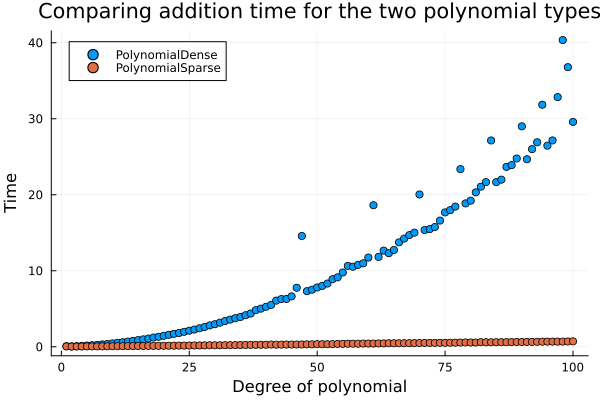

In [15]:
x = x_poly()
q = x^5

using Plots
times = zeros(100)

for n in 1:100
    start_time = time_ns()
    p = x^n 
    p + q
    end_time = time_ns()
    times[n] = Int(end_time - start_time)/10^6
end

p1 = scatter(1:100, times, label = "PolynomialDense")

y = x_polysparse()
u = y^5

times1 = zeros(100)

for n in 1:100
    start_time = time_ns()
    p = y^n 
    p + u
    end_time = time_ns()
    times1[n] = Int(end_time - start_time)/10^6
end

p2 = scatter!(1:100, times1, label = "PolynomialSparse", title ="Comparing addition time for the two polynomial types",
           xlab = "Degree of polynomial", ylab = "Time" )

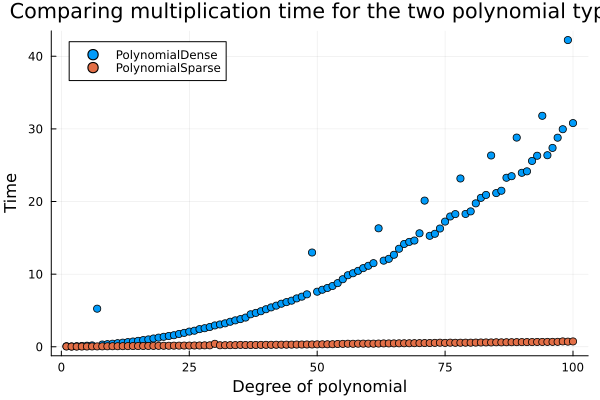

In [16]:
x = x_poly()
q = x^5

using Plots
times = zeros(100)

for n in 1:100
    start_time = time_ns()
    p = x^n 
    p*q
    end_time = time_ns()
    times[n] = Int(end_time - start_time)/10^6
end

p1 = scatter(1:100, times, label = "PolynomialDense")

y = x_polysparse()
u = y^5

times1 = zeros(100)

for n in 1:100
    start_time = time_ns()
    p = y^n 
    p*u
    end_time = time_ns()
    times1[n] = Int(end_time - start_time)/10^6
end

p2 = scatter!(1:100, times1, label = "PolynomialSparse", title ="Comparing multiplication time for the two polynomial types",
           xlab = "Degree of polynomial", ylab = "Time" )
    

On average, it takes 1340.21405 seconds to factorise a dense polynomial modulo 11


On average, it takes 760.1438999999998 seconds to factorise a sparse polynomial modulo 11


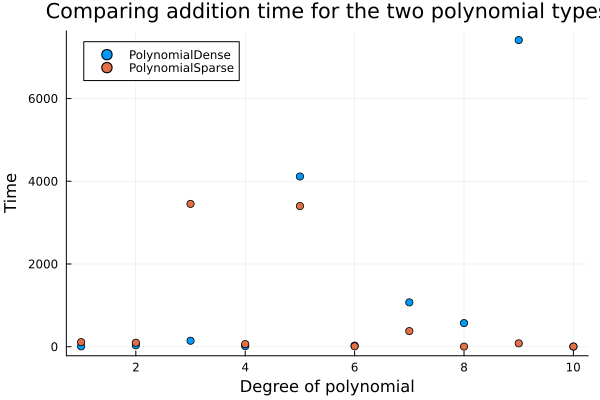

In [23]:
x = x_poly()
q = x^5

using Plots
times = zeros(10)

prime = 11

for n in 1:10
    start_time = time_ns()
    p = rand(PolynomialDense)
    factor(p, 11)
    end_time = time_ns()
    times[n] = Int(end_time - start_time)/10^6
end

average1 = mean(times)

println("On average, it takes $(average1) seconds to factorise a dense polynomial modulo 11")

y = x_polysparse()

times1 = zeros(10)

for n in 1:10
    start_time = time_ns()
    p = rand(PolynomialSparse)
    factor(p, 11)
    end_time = time_ns()
    times1[n] = Int(end_time - start_time)/10^6
end

average2 = mean(times1)

println("On average, it takes $(average2) seconds to factorise a sparse polynomial modulo 11")

As seen in the plots, operations on polynomials with large degrees is vastly more efficient with PolynomialSparse. This is because of the wastefulness of PolynomialDense, which stores zero terms up to the last nonzero term. We can see that the time taken for PolynomialSparse remains roughly constant.

However, one advantage of PolynomialDense is that its implementation is much more simple than that of PolynomialSparse and therefore relies on much less extra "machinery" in order for its associated functions to work properly. 

## Task 4

See the file polynomial_modp.jl for the implementation of this new type and its associated operations. The function pow_mod in polynomial_sparse.jl was altered using the updated methods.

In [78]:
function pow_mod(p::PolynomialSparse, n::Int, prime::Int)
     ## OLD METHOD ##
    #= n < 0 && error("No negative power")
    out = one(p)
    for _ in 1:n
        out *= p
        out = mod(out, prime)
    end
    return out =#
    return (PolynomialModP(p, prime)^n).polynomial
end

pow_mod (generic function with 3 methods)

## Task 5

I wrote my own Chinese Remainder Theorem function, and it is included in the file general_alg.jl.

In [56]:
n = crt([1,2,3,4],[5,7,13,17])

1381

In [77]:
mod(n,5), mod(n,7), mod(n,13), mod(n, 17)

(1, 2, 3, 4)

I then implemented polynomial multiplication using the CRT in the file polynomial_modp.jl, for both PolynomialSparse and PolynomialSparse128. Here is the code for PolynomialSparse:

In [76]:
# Multiplication using the Chinese Remainder Theorem
function crt_poly(a::PolynomialSparse, b::PolynomialSparse, m_a::Integer, m_b::Integer)
    c = PolynomialModP(zero(PolynomialSparse), m_a*m_b)
    n = max(degree(a),degree(b))
    for k in 1:(n+1)
        (n - k + 1) > degree(a) || !haskey(a.dict, n - k + 1) ? ak = 0 : ak = get_element(a.terms, a.dict, n - k + 1).coeff
        (n - k + 1) > degree(b) || !haskey(b.dict, n - k + 1) ? bk = 0 : bk = get_element(b.terms, b.dict, n - k + 1).coeff
        ck = crt([ak,bk], [m_a, m_b])
        c += ck*x_polysparse()^(n - k + 1)
    end
    return c
end 

function crt_multiply(a::PolynomialSparse, b::PolynomialSparse)
    height_a = maximum(abs.(coeffs(a)))
    height_b = maximum(abs.(coeffs(b)))

    B = 2*height_a*height_b*min(degree(a),degree(b))
    p = 3
    M = p
    c = PolynomialModP(a*b, M)
    
    while M < B
        p = nextprime(p+1)
        c1 = PolynomialModP(a*b, p)
        c = crt_poly(c.polynomial, c1.polynomial, M, p)
        M = M*p
    end
    return smod(c.polynomial, M)
end

crt_multiply (generic function with 2 methods)

Here are some examples:

In [61]:
a, b = rand(PolynomialSparse), rand(PolynomialSparse)

(63x⁷ + 84x⁶ + 75x⁵ + 33x⁴ + 25x³ + 68x² + 74x + 78, 9x² + 70)

In [70]:
crt_multiply(a, b) 

567x⁹ + 756x⁸ + 5085x⁷ + 6177x⁶ + 5475x⁵ + 2922x⁴ + 2416x³ + 5462x² + 5180x + 5460

In [71]:
a, b = rand(PolynomialSparse128), rand(PolynomialSparse128)

(14x⁶ + 90x⁵ + 29x⁴ + 58x³ + 38x² + 22, 29x⁵ + 37x⁴ + 67x + 4)

In [75]:
crt_multiply(a, b)

406x¹¹ + 3128x¹⁰ + 4171x⁹ + 2755x⁸ + 4186x⁷ + 7492x⁶ + 2941x⁵ + 4816x⁴ + 2778x³ + 152x² + 1474x + 88